In [16]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
train = pd.read_csv('C:/Users/손은주/TAVE/dacon_bus_dataset/train.csv',sep=',')
test = pd.read_csv('C:/Users/손은주/TAVE/dacon_bus_dataset/test.csv',sep=',')
submission = pd.read_csv('C:/Users/손은주/TAVE/dacon_bus_dataset/submission_제출양식.csv',sep=',')

date: 년월은 같으므로 일자 뽑아내기 & 요일 뽑아내기
route_id: 제거
route_nm, distance은 뭘까
vh_id : 제거
now_station, next_station은 위도 경도 있으니까 굳이 필요없음

In [17]:
# date column을 pandas의 datetime 타입으로 변경
train['date'] = train.date.apply(pd.to_datetime)

# datetime 타입에서 년,월,일,시간 추출
train['year']=train.date.apply(lambda x:x.year)
train['month']=train.date.apply(lambda x:x.month)
train['day']=train.date.apply(lambda x:x.day)

# day칼럼을 휴일이면 0, 평일이면 1로 categorical로 변경
train.loc[train['day'].isin([19,20,26,27]), 'day'] = 0
train.loc[train['day'].isin([19,20,26,27])==False, 'day'] = 1
train.head()

# year, month칼럼은 모두 2019년 10월로 공통값이므로 drop
drop_columns=['date', 'year', 'month']
train.drop(drop_columns, axis=1,inplace=True)

In [18]:
train.tail(30)
train_1 = train.drop(['id','route_id','vh_id','next_station'],axis=1,inplace=False)
train_1

,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,day
0,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,33.457724,126.554014,24,1
1,360-1,33.457724,126.554014,제대마을,06시,333.0,33.458783,126.557353,36,1
2,360-1,33.458783,126.557353,제대아파트,06시,415.0,33.459893,126.561624,40,1
3,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,33.484860,126.542928,42,1
4,360-1,33.485662,126.494923,도호동,07시,374.0,33.485822,126.490897,64,1
5,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,33.478850,126.488350,160,1
6,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,33.480700,126.489933,58,1
7,360-1,33.482142,126.483213,롯데마트,07시,341.0,33.483446,126.480758,64,1
8,360-1,33.483446,126.480758,원노형,07시,185.0,33.485854,126.480530,54,1
9,360-1,33.485854,126.480530,노형오거리,07시,252.0,33.488046,126.483112,204,1


In [19]:
train_1['arrive_hour']    = train_1['now_arrive_time'].str.replace(pat='시', repl='', regex=False)
train_1.astype({'next_arrive_time':'float'})

,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,day,arrive_hour
0,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,33.457724,126.554014,24.0,1,06
1,360-1,33.457724,126.554014,제대마을,06시,333.0,33.458783,126.557353,36.0,1,06
2,360-1,33.458783,126.557353,제대아파트,06시,415.0,33.459893,126.561624,40.0,1,06
3,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,33.484860,126.542928,42.0,1,06
4,360-1,33.485662,126.494923,도호동,07시,374.0,33.485822,126.490897,64.0,1,07
5,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,33.478850,126.488350,160.0,1,07
6,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,33.480700,126.489933,58.0,1,07
7,360-1,33.482142,126.483213,롯데마트,07시,341.0,33.483446,126.480758,64.0,1,07
8,360-1,33.483446,126.480758,원노형,07시,185.0,33.485854,126.480530,54.0,1,07
9,360-1,33.485854,126.480530,노형오거리,07시,252.0,33.488046,126.483112,204.0,1,07


In [20]:
train_1['avg_time'] = train_1.groupby(['arrive_hour'])['next_arrive_time'].transform('mean')

In [ ]:
# now_arrive_time칼럼은 모두 2019년 10월로 공통값이므로 drop
drop_columns=['date', 'year', 'month']
train.drop(drop_columns, axis=1,inplace=True)

In [22]:
#next_arrive_time/avg_time 을 하면 전체 같은 시간 중 그 날 걸린 시간의 비율이 나타남 
train_1['time_ratio'] = train_1['avg_time'] - train_1['next_arrive_time']

In [23]:
train_1

,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,day,arrive_hour,avg_time,time_ratio
0,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,33.457724,126.554014,24,1,06,85.986443,61.986443
1,360-1,33.457724,126.554014,제대마을,06시,333.0,33.458783,126.557353,36,1,06,85.986443,49.986443
2,360-1,33.458783,126.557353,제대아파트,06시,415.0,33.459893,126.561624,40,1,06,85.986443,45.986443
3,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,33.484860,126.542928,42,1,06,85.986443,43.986443
4,360-1,33.485662,126.494923,도호동,07시,374.0,33.485822,126.490897,64,1,07,85.488697,21.488697
5,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,33.478850,126.488350,160,1,07,85.488697,-74.511303
6,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,33.480700,126.489933,58,1,07,85.488697,27.488697
7,360-1,33.482142,126.483213,롯데마트,07시,341.0,33.483446,126.480758,64,1,07,85.488697,21.488697
8,360-1,33.483446,126.480758,원노형,07시,185.0,33.485854,126.480530,54,1,07,85.488697,31.488697
9,360-1,33.485854,126.480530,노형오거리,07시,252.0,33.488046,126.483112,204,1,07,85.488697,-118.511303


In [24]:
train_1['route_nm'].value_counts() #365,281,360,201 4가지 원핫인코딩 가능

365-22    31941
281-2     25884
360-1     21668
281-1     19150
201-16    15451
201-14    12999
201-12    11871
365-21    11826
360-12     8037
201-11     7895
201-22     7723
360-2      7709
201-27     5950
201-17     5102
201-21     2670
201-26     2665
201-13     2631
201-18     2558
201-24     2368
201-15     2289
360-7      2070
Name: route_nm, dtype: int64

In [27]:
train_1['route'] = train_1['route_nm'].str.split('-').str[0]

In [29]:
route_1 = pd.DataFrame({'route':['201','281','360','365']})
pd.get_dummies(route_1['route'])# 원핫인코딩 실행

,201,281,360,365
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [21]:
# https://data-newbie.tistory.com/133

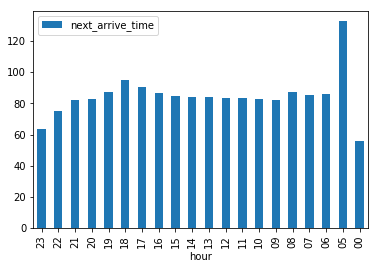

In [6]:
train_1[['hour','next_arrive_time']].groupby(['hour'], as_index=True).mean().sort_values(by='hour',ascending=False).plot.bar()

In [4]:
train_1.isna().sum()

date                0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [5]:
train_1.describe()

,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


In [6]:
train['now_station'].value_counts()

남국원(아라방면)           3361
아라주공아파트             3098
도호동                 3093
인다마을                3056
은남동                 2789
제원아파트               2728
동문로터리               2606
제주여자중고등학교(아라방면)     2474
삼무공원사거리             2363
청소년문화의집             2290
제주대학교병원             2281
제대마을                2232
아라초등학교              2215
한라병원                2192
탐라장애인 종합복지관         2166
연동주민센터              2106
제주도청 신제주로터리         2090
주공 3 4단지            2047
제주시청(광양방면)          2021
고산동산(광양방면)          1997
제주여자중고등학교(광양방면)     1939
제주중앙여자고등학교(아라방면)    1861
고산동산(아라방면)          1846
제주시청(아라방면)          1841
제주지방법원(아라방면)        1830
아랑조을거리 입구           1768
남녕고등학교              1566
평생학습관               1535
서귀포시 구 버스터미널        1514
제주지방법원(광양방면)        1486
                    ... 
신흥1번지                 82
고망난돌입구                80
태흥3리                  80
난산입구(성산기상대)           77
토산관광지구입구              77
수농원                   76
고성리 성산농협              72
효돈농협하나로마트             72
화성농장                  70


In [7]:
# test.head(30)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
5,210462,2019-10-29,405136001,7997025,360-1,33.482077,126.485355,케이티앤지,08시,199.0,롯데마트,33.482142,126.483213
6,210463,2019-10-29,405136001,7997025,360-1,33.482142,126.483213,롯데마트,08시,341.0,원노형,33.483446,126.480758
7,210464,2019-10-29,405136001,7997025,360-1,33.483446,126.480758,원노형,08시,185.0,노형오거리,33.485854,126.480530
8,210465,2019-10-29,405136001,7997025,360-1,33.488046,126.483112,남녕고등학교,08시,322.0,한라병원,33.489633,126.486000
9,210466,2019-10-29,405136001,7997025,360-1,33.489633,126.486000,한라병원,08시,291.0,삼무공원사거리,33.489900,126.488917


In [8]:
# submission.head()

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0


In [9]:
# train_1[["now_latitude", "now_longtitude"]].plot.scatter(x="now_latitude", y="now_longtitude", figsize=(8, 7), grid=True)

KeyError: "['now_longtitude'] not in index"

In [10]:
# import requests
# import json
# import pandas as pd
# from pandas.io.json import json_normalize
# import os

# import folium
# from folium import plugins
# print(folium.__version__)

0.5.0


In [11]:
# # 위도(latitude) 경도(longitude)


# map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)

In [13]:
# for item in train_1.index:
#     lat = train_1.loc[item,'now_latitude']
#     long = train_1.loc[item,'now_longitude']
#     folium.CircleMarker([lat,long],
#                         popup = train_1.loc[item,'now_station'],
#                        color='blue',
#                        fill=True).add_to(map1)

KeyboardInterrupt: 

In [15]:
# coord = [35.1559361, 129.1384361]
# map_osm = folium.Map(location = coord)
# map_osm

In [16]:
# map_osm = folium.Map(location=coord, zoom_start=12)
# map_osm

In [17]:
# map_osm = folium.Map(location = coord, tiles = 'Stamen Toner')
# map_osm

In [14]:
# coord = [35.2335123, 129.0810047]

# map_osm = folium.Map(location=coord, zoom_start=12)

# folium.Marker(coord, popup='부산대학교', tooltip = '부산대학교 tooltip').add_to(map_osm) # 마커 생성 뒤 지도에 추가해주는 기능

# map_osm.save('index.html')

# map_osm

TypeError: __init__() got an unexpected keyword argument 'tooltip'

In [18]:
# coord = [35.2335123, 129.0810047]

# map_osm = folium.Map(location=coord, zoom_start=12)

# folium.Marker(coord, popup='부산대학교', tooltip = '부산대학교 tooltip').add_to(map_osm) # 마커 생성 뒤 지도에 추가해주는 기능

# map_osm.save('index.html')

# map_osm

TypeError: __init__() got an unexpected keyword argument 'tooltip'

In [ ]:
# # 유동인구 조사지점을 지도에 표시. 0, 1, 3번째 행 생략. 첫번째 시트만 읽어옴(sheet_name이 기본값)
# 조사지점 = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', skiprow = [0, 1, 3])

# # 필요한 컬럼만 선택(조사지점명, X좌표, Y좌표)
# # 30개만 선택해서 지도에 Marker로 추가할 예정
# 조사지점30 = 조사지점[['조사지점명', 'X좌표', 'Y좌표']].head(30)
# 조사지점30.head(1)